# Kuramoto–Sivashinsky Equation

Usually, the [Kuramoto–Sivashinsky equation](https://en.wikipedia.org/wiki/Kuramoto%E2%80%93Sivashinsky_equation) is defined on 1D space with the following form:

$$
\frac{\partial \phi}{\partial t}
=-\frac{\partial^2 \phi}{\partial x^2} -\frac{\partial^4 \phi}{\partial x^4} - \phi\frac{\partial\phi}{\partial x}
$$

## Solution in 1D

In [1]:
from torchfsm.operator import Operator, Laplacian, Biharmonic, Convection

def KuramotoSivashinsky() -> Operator:
    ks_eqn = -Laplacian()- Biharmonic()-Convection()
    ks_eqn.regisiter_additional_check(lambda dim_value,dim_mesh: dim_value ==1 and dim_mesh ==1)
    return ks_eqn
ks_eqn=KuramotoSivashinsky()

In [2]:
import torch
from torchfsm.mesh import MeshGrid
from torchfsm.traj_recorder import AutoRecorder
from torchfsm.plot import plot_traj
device='cuda' if torch.cuda.is_available() else 'cpu'
L=60.0; N=100; 

mesh=MeshGrid([(0,L,N)],device=device)
x=mesh.bc_mesh_grid()
u_0=torch.randn_like(x)
traj=ks_eqn.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.5,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

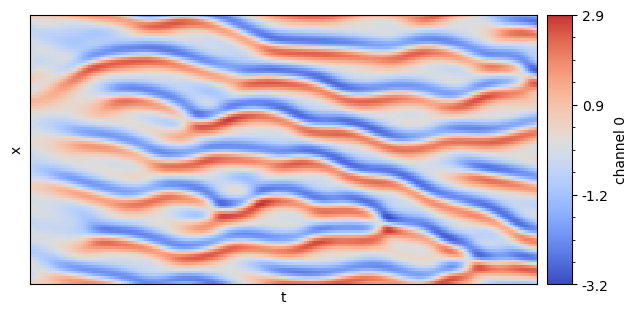

In [3]:
plot_traj(traj,animation=False)

The Kuramoto–Sivashinsky equation can also be generalized to higher dimensions. In spatially periodic domains, one possibility is

$$
\frac{\partial \mathbf{\phi}}{\partial t}
=-\nabla^2 \phi- \nabla^4 \phi - \frac{1}{2}|\nabla \phi|^2
$$

Note that the above two equations are also not equivalent in 1D space.

## Solution in 2D

In [4]:
from torchfsm.operator import KSConvection
def KuramotoSivashinskyHighDim() -> Operator:
    return -Laplacian()- Biharmonic()-KSConvection()
ks_eqn=KuramotoSivashinskyHighDim()

In [5]:
mesh=MeshGrid([(0,L,N),(0,L,N)],device=device)
x,y=mesh.bc_mesh_grid()
u_0=torch.randn_like(x)
traj=ks_eqn.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.5,
    step=200,
    trajectory_recorder=AutoRecorder(start=50,include_initial_state=False),
)

TypeError: AutoRecorder.__init__() got an unexpected keyword argument 'start'

In [ ]:
plot_traj(traj,animation=True)

## Solution in 3D

In [ ]:
mesh=MeshGrid([(0,L,N),(0,L,N),(0,L,N)],device=device)
x,_,_=mesh.bc_mesh_grid()
u_0=torch.randn_like(x)
traj=ks_eqn.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.5,
    step=200,
    trajectory_recorder=AutoRecorder(start=50,include_initial_state=False),
)

In [ ]:
plot_traj(traj)